In [1]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


'tf'

In [0]:
from PIL import Image
import glob
import cv2
train_images=[]
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/MY_data/train/paper/*.png'): #assuming gif
    #img_normal = load_img(filename)
    #print(img_normal)
    img_normal = cv2.imread(filename)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (32,32))
    train_images.append([output,0])

In [0]:
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/MY_data/train/rock/*.png'): #assuming gif
    #img_normal = load_img(filename)
    #print(img_normal)
    img_normal = cv2.imread(filename)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (32,32))
    train_images.append([output,1])

In [0]:
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/MY_data/train/scissors/*.jpg'): #assuming gif
    #img_normal = load_img(filename)
    #print(img_normal)
    img_normal = cv2.imread(filename)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (32,32))
    train_images.append([output,2])

In [0]:
import random
random.shuffle(train_images)

In [0]:
x_train=[]
y_train=[]
for im,label in train_images:
  x_train.append(im)
  y_train.append(label)

In [0]:
from PIL import Image
import glob
import cv2
test_images=[]
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/MY_data/test/paper/*.png'): #assuming gif
    #img_normal = load_img(filename)
    #print(img_normal)
    img_normal = cv2.imread(filename)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (32,32))
    test_images.append([output,0])

In [0]:
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/MY_data/test/rock/*.png'): #assuming gif
    #img_normal = load_img(filename)
    #print(img_normal)
    img_normal = cv2.imread(filename)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (32,32))
    test_images.append([output,1])

In [0]:
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/MY_data/test/scissors/*.jpg'): #assuming gif
    #img_normal = load_img(filename)
    #print(img_normal)
    img_normal = cv2.imread(filename)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (32,32))
    test_images.append([output,2])

In [0]:
random.shuffle(test_images)
x_test=[]
y_test=[]
for im,label in train_images:
  x_test.append(im)
  y_test.append(label)

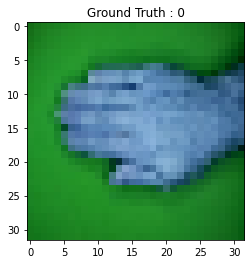

In [11]:
x_train=np.array(x_train).reshape(-1,32,32,3)
import matplotlib.pyplot as plt
plt.imshow(x_train[50,:,:])
plt.title('Ground Truth : {}'.format(y_train[50]))
plt.show()
x_test=np.array(x_test).reshape(-1,32,32,3)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [14]:
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(x_train.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [0]:
epochs = 20
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=128)


Train on 1344 samples, validate on 1344 samples
Epoch 1/20
1344/1344 [==============================] - 140s 104ms/step - loss: 1.6107 - accuracy: 0.4888 - val_loss: 0.6930 - val_accuracy: 0.5119
Epoch 2/20
1344/1344 [==============================] - 135s 101ms/step - loss: 0.6911 - accuracy: 0.5171 - val_loss: 0.6845 - val_accuracy: 0.5119
Epoch 3/20
1344/1344 [==============================] - 135s 101ms/step - loss: 0.6694 - accuracy: 0.5982 - val_loss: 0.6074 - val_accuracy: 0.8125
Epoch 4/20
1344/1344 [==============================] - 134s 100ms/step - loss: 0.5184 - accuracy: 0.7872 - val_loss: 0.4005 - val_accuracy: 0.8438
Epoch 5/20
1344/1344 [==============================] - 138s 103ms/step - loss: 0.4367 - accuracy: 0.8095 - val_loss: 0.3645 - val_accuracy: 0.8757
Epoch 6/20
1344/1344 [==============================] - 135s 100ms/step - loss: 0.3820 - accuracy: 0.8430 - val_loss: 0.2916 - val_accuracy: 0.8936
Epoch 7/20
1344/1344 [==============================] - 134s 10

In [0]:
import pickle
with open("/content/drive/My Drive/Colab Notebooks/chest_xray/Nithin.pk2",'wb') as file:
      pickle.dump(model,file)